Based on blog 

https://towardsdatascience.com/how-to-use-python-to-figure-out-sample-sizes-for-your-study-871f0a76a19c

## The scenario

You are doing a study to understand prevalence of an infection in two populations. Here in this example, we want to understand the prevalence of Pox virus infection in Hummingbirds. We want to test the hypothesis that in Hummingbirds that show clinical signs have higher proportion of Pox virus infection than hummingbirds that do show any clinical signs. We will be using two-proportions Z test to compare these two populations. To make sure how much sample size you would need to have enough power to distinguish the differences in those two populations, we will do following.

In [1]:
import math
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1
dpi = 1000
plt.rcParams['font.family'] = 'Times New Roman'


%matplotlib inline

def z_calc(p1, p2, n1, n2):
    p_star = (p1*n1 + p2*n2) / (n1 + n2)
    return (p2 - p1) / math.sqrt(p_star*(1 - p_star)*((1.0 / n1) + (1.0 / n2)))

In [6]:
stats.norm.cdf(0.95)

0.8289438736915182

In [2]:
def sample_required(p1, p_diff, alpha):
    if p_diff <= 0:
        raise ValueError("p_diff must be > 0")
    n = 1
    while True:
        z = z_calc(p1, p1+p_diff, n1=n, n2=n)
        p = 1 - stats.norm.cdf(z)
        if p < alpha:
            break
        n += 1
    return n

In [3]:
#Map how sample size changes as choice of p1 changes, holding all 
#else constant.

p1s = [x*.01 for x in range(96)]

data = []
#p_diff = 0.05
for p1 in p1s:
    record = {}
    record['Probability Difference'] = p1
    record['Sample Size to Detect Difference'] = sample_required(p1=p1,
                                                                p_diff=.05,
                                                                alpha=.05)
    record['Confidence Level'] = '95%'
    record['Initial Probability'] = p1 * 100
    data.append(record)
    
df = pd.DataFrame(data)

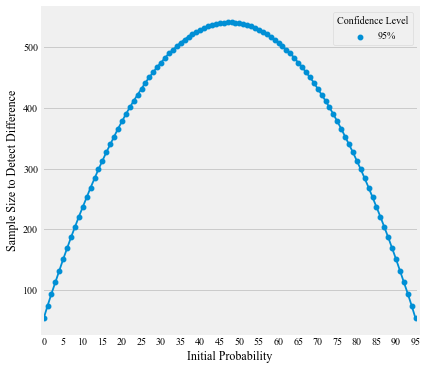

In [4]:
fig, ax = plt.subplots(figsize=(6, 6))
plot = sns.pointplot(x='Initial Probability',
            y='Sample Size to Detect Difference',
            hue='Confidence Level', ax = ax,
            data=df)

labels = []
for i in range(0, 101):
    if i % 5 == 0:
        labels.append(str(i))
    else:
        labels.append('')
plot.set_xticklabels(labels=labels)
plt.show()

In [5]:
#Observe probability difference from 2% to 10%
p_diffs = [x*.01 for x in range(20,31)]

data = []
for p_diff in p_diffs:
    record = {}
    record['Probability Difference'] = p_diff * 100
    record['Sample Size to Detect Difference'] = sample_required(p1=.5,
                                                                p_diff=p_diff,
                                                                alpha=.05)
    record['Confidence Level'] = '95%'
    record['Initial probability'] = '50%'
    data.append(record)

for p_diff in p_diffs:
    record = {}
    record['Probability Difference'] = p_diff * 100
    record['Sample Size to Detect Difference'] = sample_required(p1=.5,
                                                                p_diff=p_diff,
                                                                alpha=.01)
    record['Confidence Level'] = '99%'
    record['Initial probability'] = '50%'
    data.append(record)

df = pd.DataFrame(data)

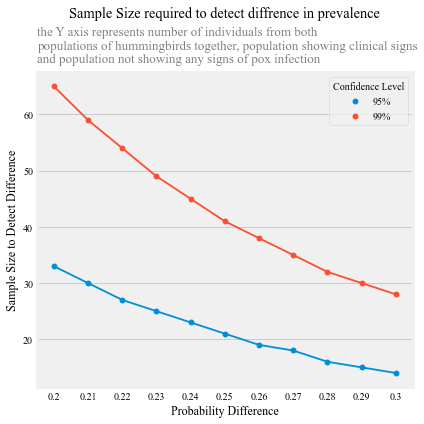

In [6]:
from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots(figsize=(6, 6))

sns.pointplot(x='Probability Difference',
            y='Sample Size to Detect Difference',
            hue='Confidence Level', ax = ax,
            data=df)
ax.set_xticklabels(p_diffs)
ax.set_title('Sample Size required to detect diffrence in prevalence\n\n\n')
text2 = 'the Y axis represents number of individuals from both\npopulations of hummingbirds together, population showing clinical signs\nand population not showing any signs of pox infection'
ax.text(-0.0, 1.02, text2, verticalalignment='bottom', 
         horizontalalignment='left',
         transform=ax.transAxes,
         color='gray', fontsize=13)
plt.tight_layout()
plt.savefig('Sample_size.png', dpi = dpi)
plt.show()

### Sample size calculation for prevalence study

n = (Z2 * P(1 - P))/e2

In [7]:
z2 = 1.96**2
p = 0.3
e = 0.05

In [8]:
def calculate_sample_prevalence(Z, P, E):
    return (Z**2 * P*(1 - P))/float(E**2)

In [9]:
calculate_sample_prevalence(Z = 1.96, P = 0.01, E = 0.01)

380.31839999999994

In [10]:
p1s = [x*.01 for x in range(96)]

In [11]:
data = []
for p in p1s:
    data.append(calculate_sample_prevalence(Z = 1.96, P = p, E = 0.05))

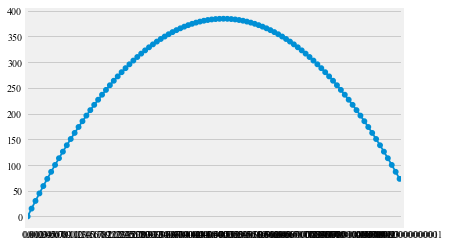

In [12]:
sns.pointplot(
        x=p1s,
        y=data,
        )

In [13]:
calculate_sample_prevalence(Z = 1.96, P = 0.05, E = 0.05)

72.99039999999998

In [14]:
calculate_sample_prevalence(Z = 1.96, P = 0.05, E = 0.05)

72.99039999999998

In [15]:
def sample_size_prevalence(N, Z, P, E):
    return (N*Z**2*P*(1 - P))/float(E**2*(N-1)+(Z**2*P*(1-P)))

In [20]:
Ns = np.arange(100, 550, 50)

In [21]:
data = []
prev = [0.01, 0.05, 0.1, 0.2, 0.4]
for p in prev:
    for n in Ns:
        record = {}
        record['Sample Size'] = sample_size_prevalence(N =n,  Z = 1.96, P = p, E = 0.05)
        record['expected prevalence'] = p
        record['Population Size'] = n
        data.append(record)


df = pd.DataFrame(data)

In [22]:
df.head()

,Sample Size,expected prevalence,Population Size
0,13.319649,0.01,100
1,13.896062,0.01,150
2,14.203391,0.01,200
3,14.394401,0.01,250
4,14.524621,0.01,300


In [25]:
df[df['expected prevalence'].isin([0.1, 0.2])]

,Sample Size,expected prevalence,Population Size
18,58.280235,0.1,100
19,72.206103,0.1,150
20,82.003311,0.1,200
21,89.270886,0.1,250
22,94.876533,0.1,300
23,99.331825,0.1,350
24,102.957914,0.1,400
25,105.966583,0.1,450
26,108.503155,0.1,500
27,71.292898,0.2,100


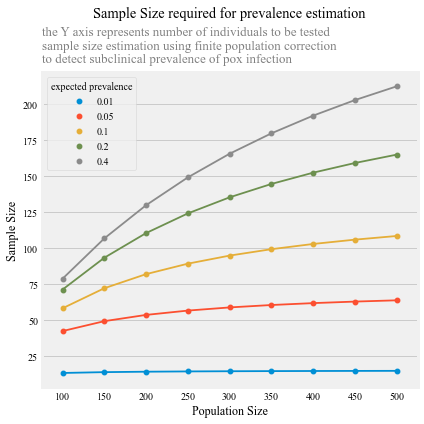

In [23]:
fig, ax = plt.subplots(figsize=(6, 6))

sns.pointplot(x='Population Size',
            y='Sample Size',
            hue='expected prevalence', ax = ax,
            data=df)
ax.set_xticklabels(Ns)
ax.set_title('Sample Size required for prevalence estimation\n\n\n')
text2 = 'the Y axis represents number of individuals to be tested\nsample size estimation using finite population correction\nto detect subclinical prevalence of pox infection'
ax.text(-0.0, 1.02, text2, verticalalignment='bottom', 
         horizontalalignment='left',
         transform=ax.transAxes,
         color='gray', fontsize=13)
plt.tight_layout()
plt.savefig('Sample_size_subclinical.png', dpi = dpi)
plt.show()